<a href="https://colab.research.google.com/github/Kushagra3219/Exploratory-Data-Analysis/blob/main/Lenet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#1 Load and Process the data

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.image.resize_with_pad(x_train[..., tf.newaxis], 32, 32) / 255.0
x_test = tf.image.resize_with_pad(x_test[..., tf.newaxis], 32, 32) / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#2 Building the LeNet5 Architecture

model = models.Sequential([
    layers.Conv2D(6, kernel_size=5 , activation='sigmoid', input_shape=(32, 32,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(16, kernel_size=5, activation='sigmoid'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(120, activation='sigmoid'),
    layers.Dense(84, activation='sigmoid'),
    layers.Dense(10, activation='softmax'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#3 Compile and train

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy' , metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=2)


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.1090 - loss: 2.3150
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.1079 - loss: 2.3026


In [ ]:
index = 0
image = x_test[index:index+2]
prediction = model.predict(image)
predicted_label = np.argmax(prediction)
predicted_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


np.int64(11)

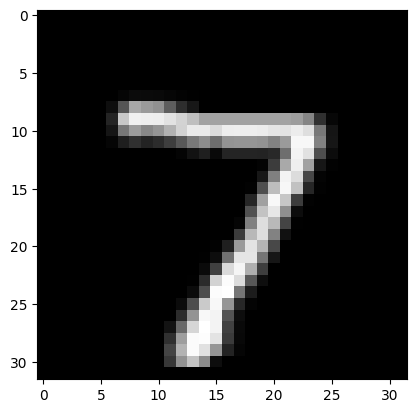

In [ ]:
plt.imshow(x_test[index].numpy().squeeze(), cmap ='grey')